In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('Hospital_Readmissions_Reduction_Program.csv')

In [13]:
data.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344 entries, 0 to 19343
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               19344 non-null  object 
 1   Facility ID                 19344 non-null  int64  
 2   State                       19344 non-null  object 
 3   Measure Name                19344 non-null  object 
 4   Number of Discharges        11440 non-null  float64
 5   Footnote                    5274 non-null   float64
 6   Excess Readmission Ratio    14071 non-null  float64
 7   Predicted Readmission Rate  14071 non-null  float64
 8   Expected Readmission Rate   14071 non-null  float64
 9   Number of Readmissions      14071 non-null  object 
 10  Start Date                  19344 non-null  object 
 11  End Date                    19344 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [166]:
too_few = data[data['Number of Readmissions'] == 'Too Few to Report']
is_null = data.loc[pd.isnull(data['Number of Discharges']) 
                   & pd.isnull(data['Number of Readmissions'])]
not_null = data.loc[pd.notnull(data['Number of Discharges']) 
                    | pd.notnull(data['Number of Readmissions'])]
not_zero = not_null[not_null['Number of Discharges'] != 0]
clean_data = not_zero.replace('Too Few to Report', np.NaN)
clean_data['Number of Readmissions'] = clean_data['Number of Readmissions'].astype(float)

In [56]:
5.5863/4.7392

1.1787432478055366

In [108]:
#data.loc[pd.isnull(data['Footnote']) & pd.isnull(data['Number of Discharges'])]
#data[data['Number of Readmissions'] == 'Too Few to Report']
#data.loc[pd.isnull(data['Number of Discharges']) 
#         & pd.notnull(data['Expected Readmission Rate'])];

In [167]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14071 entries, 0 to 19319
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               14071 non-null  object 
 1   Facility ID                 14071 non-null  int64  
 2   State                       14071 non-null  object 
 3   Measure Name                14071 non-null  object 
 4   Number of Discharges        11328 non-null  float64
 5   Footnote                    1 non-null      float64
 6   Excess Readmission Ratio    14071 non-null  float64
 7   Predicted Readmission Rate  14071 non-null  float64
 8   Expected Readmission Rate   14071 non-null  float64
 9   Number of Readmissions      11328 non-null  float64
 10  Start Date                  14071 non-null  object 
 11  End Date                    14071 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.4+ MB


In [168]:
clean_data.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,14071.000000,11328.000000,1.0,14071.000000,14071.000000,14071.000000,11328.000000
mean,259191.422429,397.193415,23.0,1.002507,15.383346,15.337661,62.696239
std,157740.361704,362.872261,NaN,0.089052,5.959672,5.778370,61.087763
min,10001.000000,26.000000,23.0,0.623000,2.199400,2.799700,11.000000
25%,110092.000000,162.000000,23.0,0.950850,13.285200,13.540200,22.000000
50%,250050.000000,293.500000,23.0,0.997800,16.712700,16.639300,43.000000
75%,390072.000000,512.000000,23.0,1.049400,19.559800,19.647700,81.000000
max,670122.000000,9356.000000,23.0,2.183200,30.257900,25.697100,906.000000


In [169]:
clean_data.groupby('Facility ID').count()['Facility Name'].value_counts().sort_index()

1    162
2     71
3    349
4    581
5    938
6    951
Name: Facility Name, dtype: int64

In [170]:
clean_data.groupby(['State']).count().sort_values('Facility ID', ascending=False)

,Facility Name,Facility ID,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
State,,,,,,,,,,,
CA,1213,1213,1213,947,0,1213,1213,1213,947,1213,1213
TX,1148,1148,1148,862,0,1148,1148,1148,862,1148,1148
FL,836,836,836,736,0,836,836,836,736,836,836
PA,663,663,663,527,0,663,663,663,527,663,663
NY,639,639,639,540,1,639,639,639,540,639,639
IL,612,612,612,525,0,612,612,612,525,612,612
OH,574,574,574,465,0,574,574,574,465,574,574
MI,430,430,430,366,0,430,430,430,366,430,430
GA,414,414,414,343,0,414,414,414,343,414,414


In [207]:
all_fac = clean_data.groupby(['State'])['Facility ID'].nunique().sort_values(ascending=False)
ami_fac = clean_data[clean_data['Measure Name'] == 'READM-30-AMI-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().sort_values(ascending=False)
cabg_fac = clean_data[clean_data['Measure Name'] == 'READM-30-CABG-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().sort_values(ascending=False)
copd_fac = clean_data[clean_data['Measure Name'] == 'READM-30-COPD-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().sort_values(ascending=False)
hf_fac = clean_data[clean_data['Measure Name'] == 'READM-30-HF-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().sort_values(ascending=False)
hk_fac = clean_data[clean_data['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().sort_values(ascending=False)
pn_fac = clean_data[clean_data['Measure Name'] == 'READM-30-PN-HRRP'].groupby(
    ['State'])['Facility ID'].nunique().sort_values(ascending=False)
states = clean_data['State'].unique()

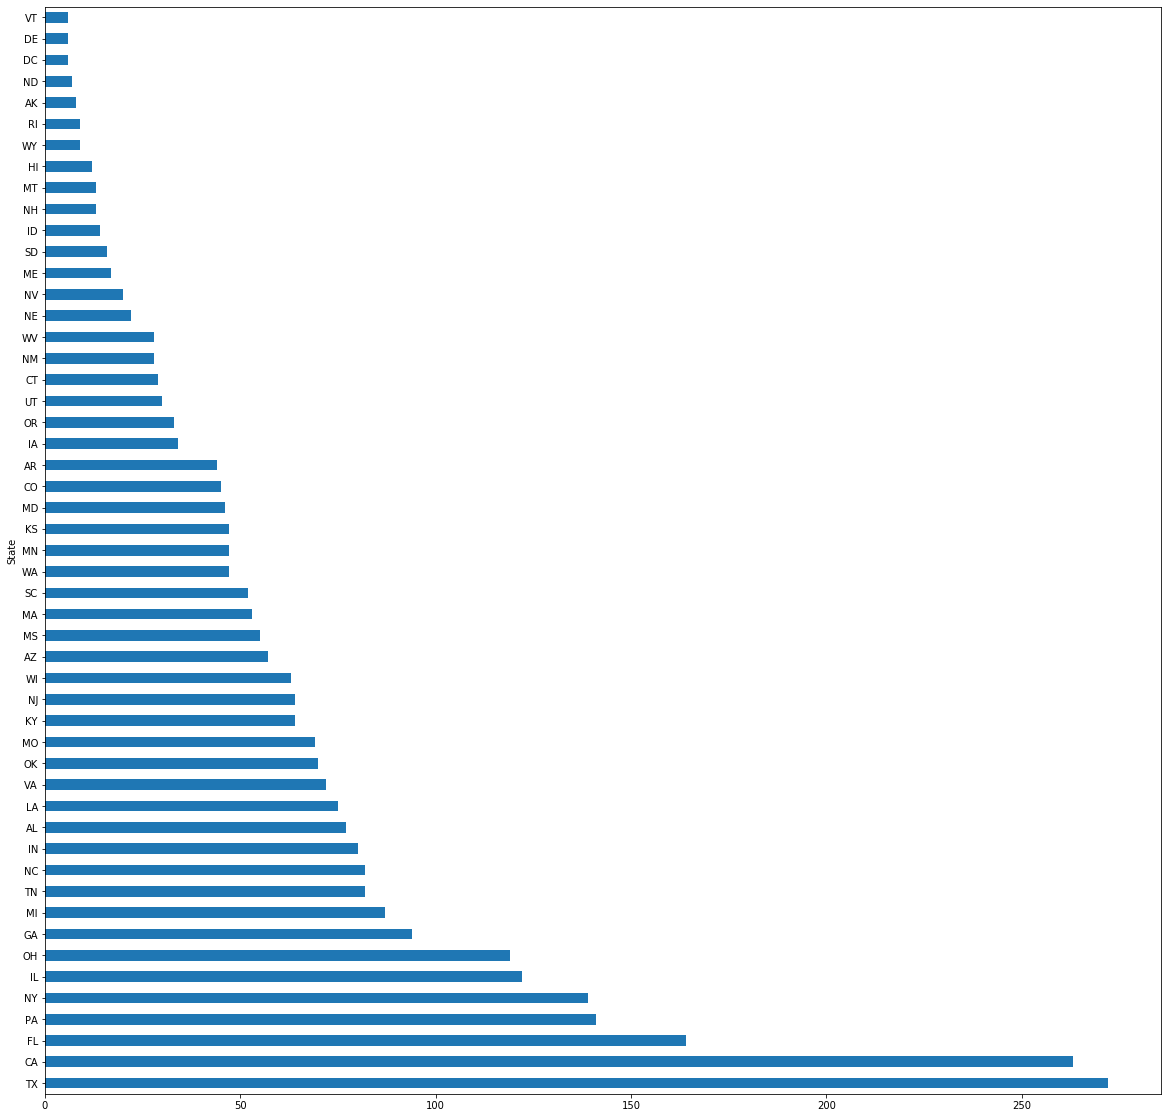

In [221]:
fig, ax = plt.subplots(figsize=(20,20))

ax = all_fac.plot.barh()
#ax = ami_fac.plot.barh()

#ax.barh(states,width=all_fac)

In [181]:
clean_data.groupby(['State']).mean().sort_values('Excess Readmission Ratio', ascending=False)

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
State,,,,,,,
MA,220071.195489,589.298701,NaN,1.041469,15.892829,15.216896,100.761905
NV,290028.200000,335.791209,NaN,1.041261,15.805611,15.165956,58.274725
NJ,310050.878882,550.586207,NaN,1.031097,16.746389,16.246070,94.251724
NY,330166.208138,435.625926,23.0,1.030577,16.706844,16.095986,76.340741
FL,100149.937799,469.415761,NaN,1.030100,16.174410,15.696120,78.854620
MS,250069.363229,340.324176,NaN,1.026362,15.888374,15.470736,58.543956
KY,180063.210526,400.778243,NaN,1.022676,16.970258,16.554158,72.050209
AR,40056.148718,377.132530,NaN,1.021702,15.057693,14.708319,59.602410
AL,10076.478261,346.019608,NaN,1.020306,15.663348,15.466084,55.403922


In [175]:
clean_data.groupby(['Measure Name']).count()

,Facility Name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
Measure Name,,,,,,,,,,,
READM-30-AMI-HRRP,2053,2053,2053,1625,0,2053,2053,2053,1625,2053,2053
READM-30-CABG-HRRP,993,993,993,579,0,993,993,993,579,993,993
READM-30-COPD-HRRP,2820,2820,2820,2521,1,2820,2820,2820,2521,2820,2820
READM-30-HF-HRRP,2843,2843,2843,2639,0,2843,2843,2843,2639,2843,2843
READM-30-HIP-KNEE-HRRP,2451,2451,2451,1261,0,2451,2451,2451,1261,2451,2451
READM-30-PN-HRRP,2911,2911,2911,2703,0,2911,2911,2911,2703,2911,2911


In [179]:
clean_data.groupby(['Measure Name']).mean()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Measure Name,,,,,,,
READM-30-AMI-HRRP,258033.864101,277.545846,NaN,1.001453,15.764015,15.710386,42.442462
READM-30-CABG-HRRP,255158.826788,182.081174,NaN,1.002192,12.809151,12.771704,23.671848
READM-30-COPD-HRRP,258433.558156,297.218167,23.0,1.001176,19.059690,19.029198,58.444268
READM-30-HF-HRRP,257906.518466,428.156499,NaN,1.001901,21.102234,21.042851,91.730959
READM-30-HIP-KNEE-HRRP,265709.915953,659.980174,NaN,1.006649,4.259320,4.223695,26.379857
READM-30-PN-HRRP,257884.025077,455.620792,NaN,1.001752,16.212461,16.159761,75.792453


In [185]:
cal = clean_data[clean_data['State'] == 'CA']
cal.groupby('Facility ID').count()

,Facility Name,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
Facility ID,,,,,,,,,,,
50002,5,5,5,5,0,5,5,5,5,5,5
50006,5,5,5,4,0,5,5,5,4,5,5
50007,6,6,6,5,0,6,6,6,5,6,6
50008,3,3,3,2,0,3,3,3,2,3,3
50009,6,6,6,4,0,6,6,6,4,6,6
...,...,...,...,...,...,...,...,...,...,...,...
50776,3,3,3,3,0,3,3,3,3,3,3
50779,3,3,3,3,0,3,3,3,3,3,3
50780,1,1,1,1,0,1,1,1,1,1,1
